In [ ]:
!pip install tensorflow opencv-python opencv-python-headless matplotlib

In [ ]:
!pip install playsound==1.2.2

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import os
from playsound import playsound
from IPython.display import Audio

In [ ]:
from google.colab import files
files.upload()


Saving kaggle (1).json to kaggle (1) (1).json


{'kaggle (1) (1).json': b'{"username":"chandana261","key":"ee3545230164f712965df74298e6e71c"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp "kaggle (1).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!git clone https://github.com/chandrikadeb7/Face-Mask-Detection.git

Cloning into 'Face-Mask-Detection'...
remote: Enumerating objects: 4590, done.
remote: Total 4590 (delta 0), reused 0 (delta 0), pack-reused 4590 (from 1)
Receiving objects: 100% (4590/4590), 186.72 MiB | 32.48 MiB/s, done.
Resolving deltas: 100% (271/271), done.
Updating files: 100% (4155/4155), done.


In [ ]:
train_path = "/content/Face-Mask-Detection/dataset"


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os


In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


In [ ]:
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary',
    subset='training'
)


Found 3274 images belonging to 2 classes.


In [ ]:
val_generator = datagen.flow_from_directory(
    train_path,
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 818 images belonging to 2 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # binary classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,333,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,353,217 (16.61 MB)

 Trainable params: 4,353,217 (16.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


Epoch 1/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 59s 572ms/step - accuracy: 0.9909 - loss: 0.0291 - val_accuracy: 0.9768 - val_loss: 0.0834
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 60s 584ms/step - accuracy: 0.9905 - loss: 0.0257 - val_accuracy: 0.9621 - val_loss: 0.1477
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 82s 583ms/step - accuracy: 0.9931 - loss: 0.0183 - val_accuracy: 0.9768 - val_loss: 0.0924
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 82s 577ms/step - accuracy: 0.9968 - loss: 0.0156 - val_accuracy: 0.9694 - val_loss: 0.0898
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 61s 596ms/step - accuracy: 0.9890 - loss: 0.0299 - val_accuracy: 0.9756 - val_loss: 0.0879
Epoch 6/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 81s 591ms/step - accuracy: 0.9944 - loss: 0.0140 - val_accuracy: 0.9792 - val_loss: 0.1010
Epoch 7/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 59s 572ms/step - accuracy: 0.9967 - loss: 0.0108 - val_accuracy: 0.9780 - val_loss: 0.1033
Epoch 8/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 61s 589ms/step - accuracy: 0.9824 - loss: 0

In [4]:
model.save("mask_detector_model.h5")
print("✅ Model saved as mask_detector_model.h5")


✅ Model saved as mask_detector_model.h5


In [5]:
from google.colab import files
uploaded = files.upload()


Saving maskkk to maskkk


In [6]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

In [7]:
# Load Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load your trained model
model = load_model("mask_detector_model.h5")

# Get uploaded file name
file_name = list(uploaded.keys())[0]


In [8]:
img = cv2.imread(file_name)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detect faces
faces = face_cascade.detectMultiScale(img_rgb, 1.2, 4)

In [9]:
for (x, y, w, h) in faces:
    face_img = img_rgb[y:y+h, x:x+w]
    resized = cv2.resize(face_img, (100, 100))
    normalized = resized / 255.0
    reshaped = np.reshape(normalized, (1, 100, 100, 3))
    result = model.predict(reshaped)

    label = "Mask" if result[0][0] < 0.5 else "No Mask"
    color = (0, 255, 0) if label == "Mask" else (255, 0, 0)

    cv2.rectangle(img_rgb, (x, y), (x+w, y+h), color, 2)
    cv2.putText(img_rgb, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


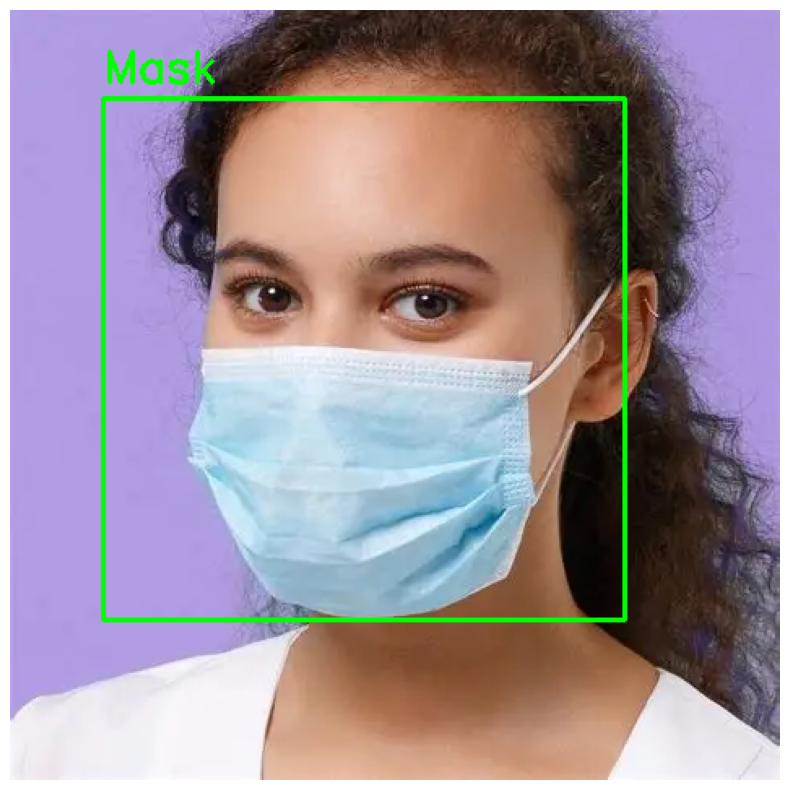

In [10]:
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()